# Урок 6. 

1. Для реализованной модели градиентного бустинга постройте графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделайте выводы о зависимости ошибки от этих параметров.
2. Модифицируйте реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки примите равным 0.5. Сравните на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

## 1.

In [5]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

In [6]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [8]:
def gb_predict(X, trees_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
    # прибавляются с шагом eta
    
#     predictions = np.zeros(X.shape[0])
#     for i, x in enumerate(X):
#         prediction = 0
#         for alg in trees_list:
#             prediction += eta * alg.predict([x])[0]
#         predictions[i] = prediction
        
    predictions = np.array(
        [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
    )

    return predictions

In [9]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [10]:
def residual(y, z):
    return - (z - y)

In [11]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, residual(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [44]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, eta):
    train_prediction = gb_predict(X_train, trees, eta)

    #print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    #с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')
    return mean_squared_error(y_test, test_prediction), n_trees

Ошибка алгоритма из 1 деревьев глубиной 1     с шагом 0.1 на тестовой выборке: 24841.86955071202
Ошибка алгоритма из 10 деревьев глубиной 1     с шагом 0.1 на тестовой выборке: 6993.914258659092
Ошибка алгоритма из 20 деревьев глубиной 1     с шагом 0.1 на тестовой выборке: 3795.9897308924233
Ошибка алгоритма из 30 деревьев глубиной 1     с шагом 0.1 на тестовой выборке: 3156.7514612087884
Ошибка алгоритма из 40 деревьев глубиной 1     с шагом 0.1 на тестовой выборке: 2954.8810541600137
Ошибка алгоритма из 50 деревьев глубиной 1     с шагом 0.1 на тестовой выборке: 2870.2544929373817
Ошибка алгоритма из 60 деревьев глубиной 1     с шагом 0.1 на тестовой выборке: 2815.2907890506813
Ошибка алгоритма из 70 деревьев глубиной 1     с шагом 0.1 на тестовой выборке: 2777.977327279202
Ошибка алгоритма из 80 деревьев глубиной 1     с шагом 0.1 на тестовой выборке: 2738.8150845218715
Ошибка алгоритма из 90 деревьев глубиной 1     с шагом 0.1 на тестовой выборке: 2704.550142638052
Ошибка алгоритм

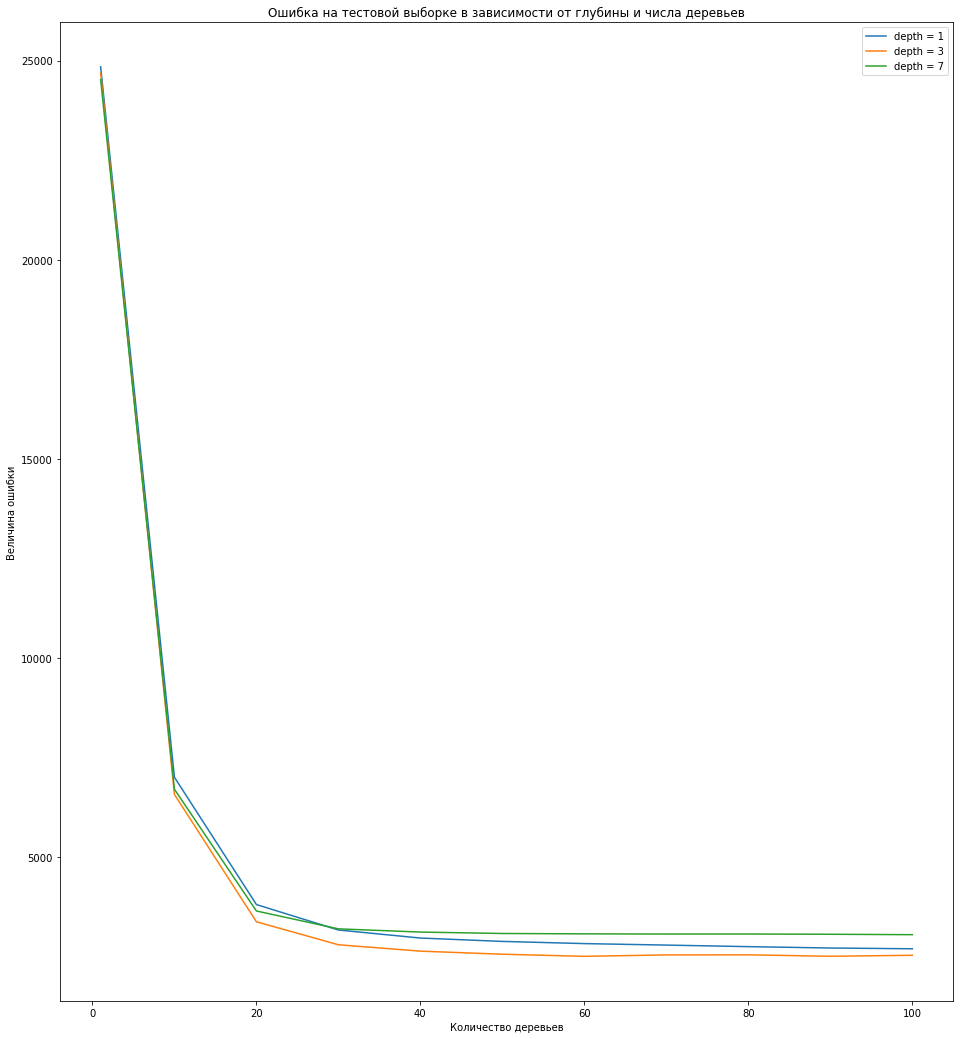

In [46]:
trees_array = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
eta = 0.1
max_depth_array = [1, 3, 7]
fif, ax= plt.subplots(figsize = (16, 18))
for max_depth in max_depth_array: 
    xx = []
    yy = []
    for n_trees in trees_array:
        trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)
        a, b = evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)
        xx.append(b)
        yy.append(a)
    plt.plot(xx, yy, label = f'depth = {max_depth}')

plt.title(f'Ошибка на тестовой выборке в зависимости от глубины и числа деревьев')
plt.xlabel('Количество деревьев')
plt.ylabel('Величина ошибки')
plt.legend(loc='upper right')
plt.show()

Из графика видно, что сначала увеличение кол-ва и глубины деревьев приводит к уменьшению ошибки, а потом - к увеличению. Т.о. из предоставленных моделей с меньшей ошибкой является модель из 100 (можно и меньше, где-то начиная с 50 деревьев ошибка сильно не изменяется) деревьев и глубиной = 3.

## 2.

Добавим в функцию gb_fit код для создания списка случайных индексов из датасета, при этом размер списка будет в 2 раза меньше, согласно условию задания, и потом этот урезанный датасет мы будем использовать на обучении деревьв. Затем сравним результаты предсказаний деревьев, которые были обучены на полном датасете (функция gb_fit_original) и на урезанном (gb_fit_half).

In [12]:
def gb_fit_original(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, residual(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, test_errors

In [20]:

def gb_fit_half(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        
        # Определяем случайные индексы
        random_idx = set()
        
        while len(random_idx) < X_train.shape[0]//2:
            random_idx.add(np.random.randint(0, X_train.shape[0]))
        random_idx=list(random_idx)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train[random_idx], y_train[random_idx])
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train[random_idx], residual(y_train[random_idx], target[random_idx]))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, test_errors

In [25]:
n_trees=150
max_depth=3
eta=0.1
trees_v01, test_errors_original = gb_fit_original(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)
trees_v02, test_errors_half = gb_fit_half(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

In [26]:
def get_error_plot(n_trees, test_errors_original, test_errors_half):
    plt.figure(figsize=(16,18))
    plt.xlabel('Кол-во итераций')
    plt.ylabel('Ошибка')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), test_errors_original, label='ошибка при обучении на полном датасете')
    plt.plot(list(range(n_trees)), test_errors_half, label='ошибка при обучении на половине датасета')
    plt.legend(loc='upper right')
    plt.show()

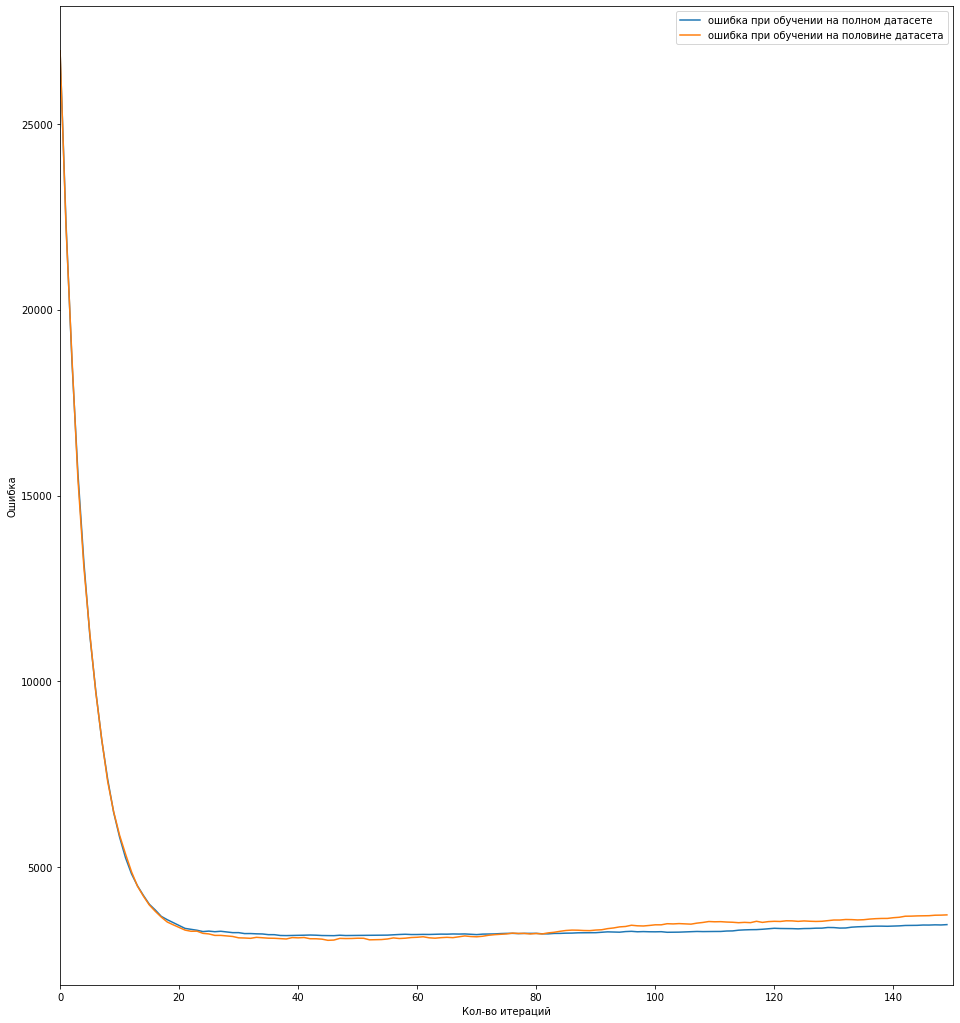

In [27]:
get_error_plot(n_trees, test_errors_original, test_errors_half)

Обучение на половине выборке до определенного момента ничем не уступает алгоритму обученному на всей выборке